In [5]:
import numpy as np
from faker import Faker
import random
from tqdm import tqdm
from babel.dates import format_date
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
Faker.seed(12345)
random.seed(12345)

2024-01-24 12:07:20.340114: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers import UpSampling2D, Conv2D, MaxPooling2D
from keras.optimizers.legacy import Adam 
#from keras.layers import LSTM, Bidirectional 
from keras.datasets import mnist

In [7]:
class AutoEncoder(object):
    def __init__(self):
        self.encoding_dim = 32
        self.decoding_dim = 784
        self.model = self.auto_encoder_model()
        
    def auto_encoder_model(self):
        input_img = Input(shape=(784,))
        encoder = Dense(self.encoding_dim, activation='relu')(input_img)
        decoder = Dense(self.decoding_dim, activation='sigmoid')(encoder)
        auto_encoder = Model(inputs=input_img, outputs = decoder)
        auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
        return auto_encoder 
    
    def train(self):
        (x_train, _), (x_test, _) = mnist.load_data()
        
        x_train = x_train.astype("float32") / 255.
        x_test = x_test.astype("float32") / 255.
        
        
        x_train = np.reshape(x_train, (len(x_train), np.prod(x_train.shape[1:])))
        x_test = np.reshape(x_test, (len(x_test), np.prod(x_test.shape[1:])))
        
        print(x_train.shape)
        print(x_test.shape)
        
        self.model.fit(x_train, x_train, 
                      epochs=5,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test, x_test))
        
    def display(self):
        
        (x_train, _), (x_test, _) = mnist.load_data()
        
        x_test = np.reshape(x_test, (len(x_test), np.prod(x_test.shape[1:])))
        
        decoded_imgs = self.model.predict(x_test)
        
        plt.figure(figsize=(20,4))
        
        n = 5
        
        for i in range(n):
            
            ax = plt.subplot(2, n, i+1)
            plt.imshow(x_test[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
            ax = plt.subplot(2, n, i+n+1)
            plt.imshow(x_test[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
        plt.show()
        
        
        

(60000, 784)
(10000, 784)
Epoch 1/5
235/235 [==============================] - 2s 7ms/step - loss: 0.2775 - val_loss: 0.1932
Epoch 2/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1717 - val_loss: 0.1536
Epoch 3/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1442 - val_loss: 0.1335
Epoch 4/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1282 - val_loss: 0.1210
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


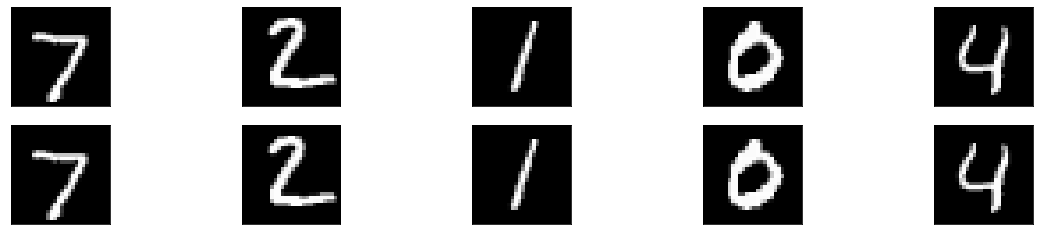

In [9]:
if __name__ == '__main__':
    
    ae = AutoEncoder()
    ae.train()
    ae.display()

In [10]:
class AutoEncoder_deep(object):
    def __init__(self):
        self.encoding_dim = 32
        self.decoding_dim = 784
        self.model = self.auto_encoder_model()
        
    def auto_encoder_model(self):
        input_img = Input(shape=(784,))
        encoded = Dense(128, activation='relu')(input_img)
        encoded = Dense(64, activation='relu')(encoded)
        encoded = Dense(32, activation='relu')(encoded)
        
        decoded = Dense(64, activation='relu')(encoded)
        decoded = Dense(128, activation='relu')(decoded)
        decoded = Dense(784, activation='relu')(decoded)
        
        auto_encoder = Model(inputs=input_img, outputs = decoded)
        auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
        
        return auto_encoder 
    
    def train(self):
        (x_train, _), (x_test, _) = mnist.load_data()
        
        x_train = x_train.astype("float32") / 255.
        x_test = x_test.astype("float32") / 255.
        
        
        x_train = np.reshape(x_train, (len(x_train), np.prod(x_train.shape[1:])))
        x_test = np.reshape(x_test, (len(x_test), np.prod(x_test.shape[1:])))
        
        print(x_train.shape)
        print(x_test.shape)
        
        self.model.fit(x_train, x_train, 
                      epochs=5,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test, x_test))
        
    def display(self):
        
        (x_train, _), (x_test, _) = mnist.load_data()
        
        x_test = np.reshape(x_test, (len(x_test), np.prod(x_test.shape[1:])))
        
        decoded_imgs = self.model.predict(x_test)
        
        plt.figure(figsize=(20,4))
        
        n = 5
        
        for i in range(n):
            
            ax = plt.subplot(2, n, i+1)
            plt.imshow(x_test[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
            ax = plt.subplot(2, n, i+n+1)
            plt.imshow(x_test[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
        plt.show()
        

(60000, 784)
(10000, 784)
Epoch 1/5
235/235 [==============================] - 4s 12ms/step - loss: 0.5764 - val_loss: 0.4549
Epoch 2/5
235/235 [==============================] - 3s 11ms/step - loss: 0.3783 - val_loss: 0.3276
Epoch 3/5
235/235 [==============================] - 3s 11ms/step - loss: 0.3078 - val_loss: 0.2964
Epoch 4/5
235/235 [==============================] - 3s 12ms/step - loss: 0.2961 - val_loss: 0.2656
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


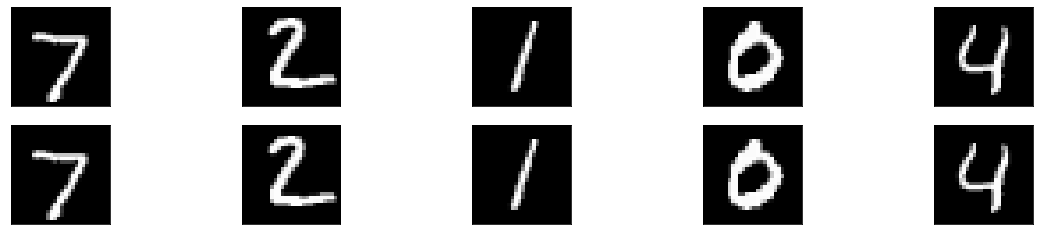

In [11]:
if __name__ == '__main__':
    
    ae = AutoEncoder_deep()
    ae.train()
    ae.display()

In [18]:
class AutoEncoder_CNN(object):
    def __init__(self):
        self.encoding_dim = 32
        self.decoding_dim = 784
        self.model = self.auto_encoder_model()
        
    def auto_encoder_model(self):
        input_img = Input(shape=(28,28,1))
        x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
        x = MaxPooling2D((2,2), padding='same')(x)
        x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
        encoded = MaxPooling2D((2,2), padding='same')(x)
        print(encoded)
        
        x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
        x = UpSampling2D((2,2))(x)
        x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
        x = UpSampling2D((2,2))(x)
        decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
        print(decoded)
        auto_encoder = Model(inputs=input_img, outputs = decoded)
        auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
        
        return auto_encoder 
    
    def train(self):
        (x_train, _), (x_test, _) = mnist.load_data()
        
        x_train = x_train.astype("float32") / 255.
        x_test = x_test.astype("float32") / 255.
        
        
        x_train = np.reshape(x_train, (len(x_train), 28,28,1))
        x_test = np.reshape(x_test, (len(x_test), 28,28,1))
        
        print(x_train.shape)
        print(x_test.shape)
        
        self.model.fit(x_train, x_train, 
                      epochs=5,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test, x_test))
        
    def display(self):
        
        (x_train, _), (x_test, _) = mnist.load_data()
        
        x_test = np.reshape(x_test, (len(x_test), 28,28,1))
        
        decoded_imgs = self.model.predict(x_test)
        
        plt.figure(figsize=(20,4))
        
        n = 5
        
        for i in range(n):
            
            ax = plt.subplot(2, n, i+1)
            plt.imshow(x_test[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
            ax = plt.subplot(2, n, i+n+1)
            plt.imshow(x_test[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
        plt.show()
        

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 32), dtype=tf.float32, name=None), name='max_pooling2d_4/MaxPool:0', description="created by layer 'max_pooling2d_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), name='conv2d_11/Sigmoid:0', description="created by layer 'conv2d_11'")
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/5
235/235 [==============================] - 53s 221ms/step - loss: 0.1470 - val_loss: 0.0852
Epoch 2/5
235/235 [==============================] - 51s 218ms/step - loss: 0.0808 - val_loss: 0.0765
Epoch 3/5
235/235 [==============================] - 50s 213ms/step - loss: 0.0757 - val_loss: 0.0734
Epoch 4/5
235/235 [==============================] - 49s 210ms/step - loss: 0.0733 - val_loss: 0.0728
Epoch 5/5
313/313 [==============================] - 2s 6ms/step


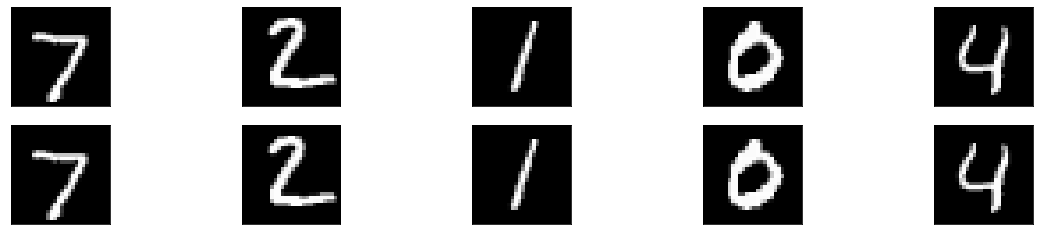

In [19]:
if __name__ == '__main__':
    
    ae = AutoEncoder_CNN()
    ae.train()
    ae.display()

In [22]:
class AutoEncoder_CNN_noise(object):
    def __init__(self):
        self.encoding_dim = 32
        self.decoding_dim = 784
        self.model = self.auto_encoder_model()
        
    def auto_encoder_model(self):
        input_img = Input(shape=(28,28,1))
        x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
        x = MaxPooling2D((2,2), padding='same')(x)
        x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
        encoded = MaxPooling2D((2,2), padding='same')(x)
        print(encoded)
        
        x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
        x = UpSampling2D((2,2))(x)
        x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
        x = UpSampling2D((2,2))(x)
        decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
        print(decoded)
        auto_encoder = Model(inputs=input_img, outputs = decoded)
        auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
        
        return auto_encoder 
    
    def train(self):
        (x_train, _), (x_test, _) = mnist.load_data()
        
        x_train = x_train.astype("float32") / 255.
        x_test = x_test.astype("float32") / 255.
        
        
        x_train = np.reshape(x_train, (len(x_train), 28,28,1))
        x_test = np.reshape(x_test, (len(x_test), 28,28,1))
        
        print(x_train.shape)
        print(x_test.shape)
        
        x_train_noisy = x_train + np.random.normal(loc=0.0, scale=3.0, size=x_train.shape)
        x_test_noisy = x_test + np.random.normal(loc=0.0, scale=3.0, size=x_test.shape)
        
        x_train_noisy = np.clip(x_train_noisy, 0., 1.)
        x_test_noisy = np.clip(x_test_noisy, 0., 1.)
        
        self.model.fit(x_train_noisy, x_train, 
                      epochs=5,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test_noisy, x_test))
        
    def display(self):
        
        (x_train, _), (x_test, _) = mnist.load_data()
        
        x_test = np.reshape(x_test, (len(x_test), 28,28,1))
        
        x_test_noisy = x_test + np.random.normal(loc=3.0, scale=10.0, size=x_test.shape)
        
        decoded_imgs = self.model.predict(x_test_noisy)
        
        plt.figure(figsize=(20,4))
        
        n = 5
        
        for i in range(n):
            
            ax = plt.subplot(2, n, i+1)
            plt.imshow(x_test_noisy[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
            ax = plt.subplot(2, n, i+n+1)
            plt.imshow(x_test[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
        plt.show()

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 32), dtype=tf.float32, name=None), name='max_pooling2d_6/MaxPool:0', description="created by layer 'max_pooling2d_6'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), name='conv2d_16/Sigmoid:0', description="created by layer 'conv2d_16'")
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/5
235/235 [==============================] - 53s 220ms/step - loss: 0.2879 - val_loss: 0.2568
Epoch 2/5
235/235 [==============================] - 52s 222ms/step - loss: 0.2557 - val_loss: 0.2554
Epoch 3/5
235/235 [==============================] - 56s 236ms/step - loss: 0.2540 - val_loss: 0.2534
Epoch 4/5
235/235 [==============================] - 54s 229ms/step - loss: 0.2530 - val_loss: 0.2520
Epoch 5/5
313/313 [==============================] - 2s 6ms/step


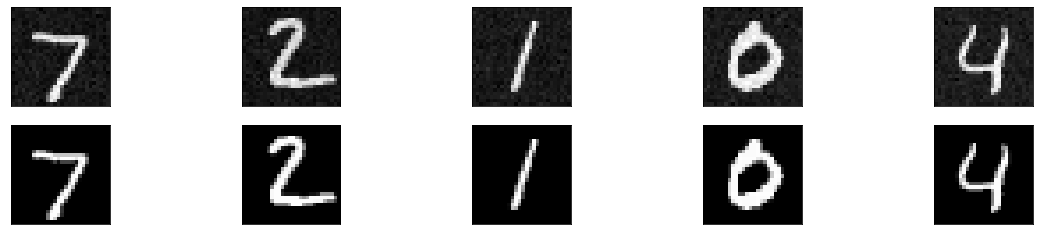

In [23]:
if __name__ == '__main__':
    
    ae = AutoEncoder_CNN_noise()
    ae.train()
    ae.display()